In [1]:
%reload_ext autoreload
%autoreload 2
%pylab inline
plt.rcParams['figure.dpi'] = 150
import seaborn as sns
import keprat.io
import os
PAPERDIR = '/Users/petigura/Dropbox/Research/Kepler-Radius-Ratio/paper/'
reload(keprat.io)
sns.set_context('paper')
import keprat.io
sns.set_context('paper',font_scale=1.0)
sns.set_style('ticks')
from mpl_toolkits.axes_grid.anchored_artists import AnchoredText
letter_bbox_props = dict(
    boxstyle="round,pad=0.,rounding_size=0.2",fc='w',alpha=0.7,
    ec='none'
)
letter_text_props = dict(size='large', weight='bold')

def letter_plot(letter):
    ax = gca()
    at = AnchoredText(letter,loc=2, frameon=True, prop=letter_text_props)
    ax.add_artist(at)
    setp(at.patch,**letter_bbox_props)        

Populating the interactive namespace from numpy and matplotlib


In [2]:
import matplotlib
print matplotlib.__version__

2.0.2


keprat/io.py:315: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df = pd.read_csv(fn,sep='\t+',names=columns,skiprows=1,index_col=None)
/Users/petigura/anaconda2/lib/python2.7/site-packages/matplotlib/offsetbox.py:1243: UserWarning: Mixing horizontalalignment or verticalalignment with AnchoredText is not supported.
  warnings.warn("Mixing horizontalalignment or verticalalignment "
/Users/petigura/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:42: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike


read table dr22 from keprat/../data/kepler_project_chains.hdf
read table dr25 from keprat/../data/kepler_project_chains.hdf
read table t18 from load_table_cache.hdf
read table v18 from load_table_cache.hdf


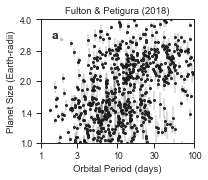

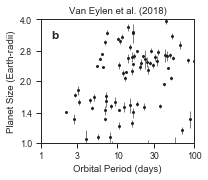

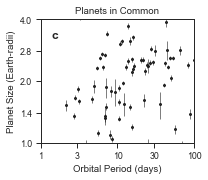

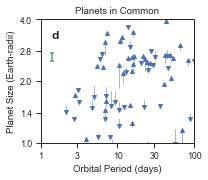

In [3]:
def _format():
    fig = gcf()
    xlim(1,100)
    ylim(1,4)
    xt = [1,3,10,30,100]
    yt = [1.0,1.4,2.0,2.8,4.0]
    xticks(xt,xt)
    yticks(yt,yt)
    minorticks_off()
    xlabel('Orbital Period (days)')
    ylabel('Planet Size (Earth-radii)')
    fig.set_size_inches((3,2.5))
    tight_layout()

df = keprat.io.load_table('f18')
fig = figure()
loglog()
#yerr = np.vstack([df['E_Rp'],df['e_Rp']])
errorbar(df.f18_period,df.f18_prad,yerr=df.f18_prad_err,lw=0.25,mew=2,ms=2,fmt='.')
_format()
letter_plot('a')
title('Fulton & Petigura (2018)')
fn = os.path.join(PAPERDIR,'fig_f18.pdf')
fig.savefig(fn)
f18 = df.copy()

df = keprat.io.load_table('v18')
yerr = np.vstack([-df.v18_prad_err2,df.v18_prad_err1])
fig = figure()
loglog()
#yerr = np.vstack([df['E_Rp'],df['e_Rp']])
errorbar(df.v18_period,df.v18_prad,yerr=yerr,lw=0.5,mew=2,ms=2,fmt='.')
_format()
letter_plot('b')
title('Van Eylen et al. (2018)')
fn = os.path.join(PAPERDIR,'fig_v18.pdf')
fig.savefig(fn)
v18 = df.copy()


f18.index = f18.id_koicand
df = f18.loc[v18.id_koicand]
fig = figure()
loglog()
#yerr = np.vstack([df['E_Rp'],df['e_Rp']])
errorbar(df.f18_period,df.f18_prad,yerr=df.f18_prad_err,lw=0.5,mew=2,ms=2,fmt='.')
_format()
letter_plot('c')
title('Planets in Common')
fn = os.path.join(PAPERDIR,'fig_f18-v18-subset.pdf')

df = keprat.io.load_table('all')
df = df.dropna(subset=['f18_prad','v18_prad'])

fig = figure()
loglog()
for i,row in df.iterrows():
    plot([row.f18_period,row.f18_period],[row.v18_prad,row.f18_prad],color='b',lw=1,alpha=0.5)
    if row.v18_prad > row.f18_prad:
        plot([row.f18_period],[row.v18_prad],marker='^',ms=4,color='b')
    else:
        plot([row.f18_period],[row.v18_prad],marker='v',ms=4,color='b')

    
    
_format()
plot([1.4,1.4],[2.5,2.5*1.1],'g-',mew=1.5,lw=1.5,marker='_',ms=4)

letter_plot('d')
title('Planets in Common')
fig.savefig('paper/fig_f18-arrows.pdf')

## Difference between V18 and F18

read table dr22 from keprat/../data/kepler_project_chains.hdf
read table dr25 from keprat/../data/kepler_project_chains.hdf
read table t18 from load_table_cache.hdf
read table v18 from load_table_cache.hdf
read table dr22 from keprat/../data/kepler_project_chains.hdf
read table dr25 from keprat/../data/kepler_project_chains.hdf
read table t18 from load_table_cache.hdf
read table v18 from load_table_cache.hdf
read table v18 from load_table_cache.hdf
read table dr25 from load_table_cache.hdf
read table v18 from load_table_cache.hdf
read table dr25 from load_table_cache.hdf


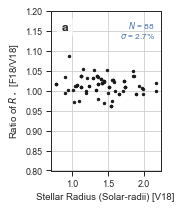

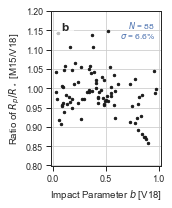

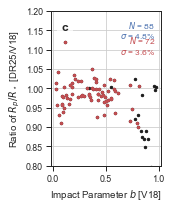

In [4]:
def fig_compare_ratio(x,y,textkw=dict(size='small',va='top',color='b',ha='right'),plotkw={},fig=None,tx=0.95,ty=0.95,):
    if fig==None:
        fig = figure(figsize=(2.5,3))
        
    plot(x,y,'.',**plotkw)
    RMS = y.std()
    N = y.count()

    s = """\
$N$ = {}
$\sigma$ = {:.1f}%""".format(N,RMS*100)

    text(tx,ty, s, transform=gca().transAxes,**textkw )
    ylim(0.8,1.2)
    tight_layout()
    
    
    
df = keprat.io.load_table('all')
df = df.dropna(subset=['f18_prad','v18_prad'])
x = df.v18_srad
y = df.f18_srad / df.v18_srad
fig_compare_ratio(x,y)
ylabel('Ratio of $R_\star$ [F18/V18]')
xlabel('Stellar Radius (Solar-radii) [V18]')
tight_layout()
grid()
letter_plot('a')

savefig('paper/fig_compare-srad-f18-v18.pdf')

df = keprat.io.load_table('all')
df = df.dropna(subset=['f18_prad','v18_prad'])
x = df.v18_impact
y = df.m15_ror / df.v18_ror
fig_compare_ratio(x,y)
ylabel('Ratio of $R_p / R_\star$ [M15/V18]')
xlabel('Impact Parameter $b$ [V18]')
tight_layout()
grid()
letter_plot('b')
savefig('paper/fig_compare-ror-m15-v18.pdf')


df = keprat.io.load_table('cksgaia-planets')
df = df.dropna(subset=['f18_prad','v18_prad'])
x = df.v18_impact
y = df.dr25_RD1_cum / df.v18_ror
fig_compare_ratio(x,y)

ylabel('Ratio of $R_p / R_\star$ [DR25/V18]')
xlabel('Impact Parameter $b$ [V18]')
tight_layout()
fig = gcf()

df = keprat.io.load_table('cksgaia-planets')
df = df.dropna(subset=['f18_prad','v18_prad']).query('dr25_tau / f18_tau0 > 0.6')
x = df.v18_impact
y = df.dr25_RD1_cum / df.v18_ror
grid()

fig_compare_ratio(x,y,fig=fig,plotkw=dict(color='r'),tx=0.95,ty=0.85,textkw=dict(color='r',size='small',va='top',ha='right'))
letter_plot('c')
savefig('paper/fig_compare-ror-dr25-v18.pdf')

read table dr22 from keprat/../data/kepler_project_chains.hdf
read table dr25 from keprat/../data/kepler_project_chains.hdf
read table t18 from load_table_cache.hdf
read table v18 from load_table_cache.hdf


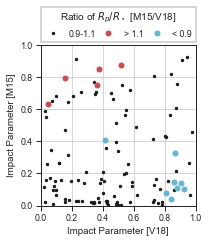

In [5]:
fig  = figure(figsize=(3,3.5))
df = keprat.io.load_table('all')
#df = df.dropna(subset=['f18_prad','v18_prad'])

plot(df.v18_impact,df.m15_impact,'.',label='0.9-1.1')
#xerr = vstack([-df.v18_impact_err2,df.v18_impact_err1])
#yerr = vstack([-df.m15_impact_err2,df.m15_impact_err1])
#errorbar(df.v18_impact,df.m15_impact,xerr=xerr,fmt='.',label='0.9-1.1')

cut = df.query('f18_ror / v18_ror  > 1.1')
plot(cut.v18_impact,cut.m15_impact,'r.',ms=10,label='> 1.1')
cut = df.query('f18_ror / v18_ror < 0.90')
plot(cut.v18_impact,cut.m15_impact,'c.',ms=10,label='< 0.9')
xlabel('Impact Parameter [V18]')
ylabel('Impact Parameter [M15]')
leg = plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower left',
           ncol=3, mode="expand", borderaxespad=0.,
           title=r'Ratio of $R_p/R_\star$ [M15/V18]',
           fancybox=False,frameon=True)
leg.get_frame().set_linewidth(2)

xlim(0,1.0)
ylim(0,1.0)
grid()
tight_layout()
fig.subplots_adjust(top=0.8)

fig.savefig('paper/fig_impact-v18-m15.pdf')

read table dr22 from keprat/../data/kepler_project_chains.hdf
read table dr25 from keprat/../data/kepler_project_chains.hdf
read table t18 from load_table_cache.hdf
read table v18 from load_table_cache.hdf


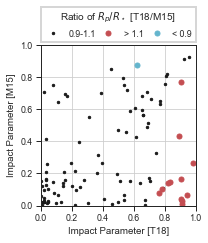

In [6]:
fig  = figure(figsize=(3,3.5))
df = keprat.io.load_table('all')
df = df.dropna(subset=['m15_prad','v18_prad'])

plot(df.t18_impact,df.m15_impact,'.',label='0.9-1.1')
#xerr = vstack([-df.v18_impact_err2,df.v18_impact_err1])
#yerr = vstack([-df.m15_impact_err2,df.m15_impact_err1])
#errorbar(df.v18_impact,df.m15_impact,xerr=xerr,fmt='.',label='0.9-1.1')

cut = df.query('t18_ror / m15_ror  > 1.1')
plot(cut.t18_impact,cut.m15_impact,'r.',ms=10,label='> 1.1')
cut = df.query('t18_ror / m15_ror  < 0.90')
plot(cut.t18_impact,cut.m15_impact,'c.',ms=10,label='< 0.9')
xlabel('Impact Parameter [T18]')
ylabel('Impact Parameter [M15]')
leg = plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower left',
           ncol=3, mode="expand", borderaxespad=0.,
           title=r'Ratio of $R_p/R_\star$ [T18/M15]',
           fancybox=False,frameon=True)

leg.get_frame().set_linewidth(2)

#legend(framealpha=1,loc='upper right',title=r'Ratio of $R_p/R_\star$')
xlim(0,1.0)
ylim(0,1.0)
grid()
tight_layout()
fig.subplots_adjust(top=0.8)
fig.savefig('paper/fig_impact-t18-m15.pdf')

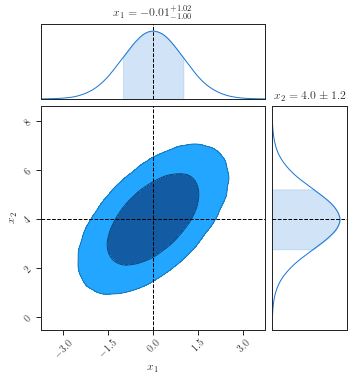

In [7]:
np.random.seed(0)
import chainconsumer

data = np.random.multivariate_normal([0.0, 4.0], [[1.0, 0.7], [0.7, 1.5]], size=1000000)

c =  chainconsumer.ChainConsumer()
c.add_chain(data, parameters=["$x_1$", "$x_2$"])
fig = c.plotter.plot(figsize="column", truth=[0.0, 4.0])

# If we wanted to save to file, we would instead have written
# fig = c.plotter.plot(filename="location", figsize="column", truth=[0.0, 4.0])

# If we wanted to display the plot interactively...
# fig = c.plotter.plot(display=True, figsize="column", truth=[0.0, 4.0])


In [9]:
import chainconsumer
import matplotlib.ticker as ticker

def plot_corner(id_koicand):
    fmt = {}
    df = keprat.io.load_table('all')
    df.index = df.id_koicand
    table = "chains-dr25-{}".format(id_koicand)
    chain = keprat.io.load_table(table)
    data = array(chain['BB1 RD1'.split()])
    c = chainconsumer.ChainConsumer()  
    c.add_chain(data,parameters=['Impact Parameter $b$','$R_p/R_\star$ (\%)'])
    c.configure(cloud=False,summary=False,diagonal_tick_labels=False)
    c.plotter.plot()
    fig = gcf()
    axL = fig.get_axes()
    ax = axL[2]

    sca(ax)
    scale_y = 1e-2
    ticks_y = ticker.FuncFormatter(lambda x, pos: '{0:.2f}'.format(x/scale_y))
    ax.yaxis.set_major_formatter(ticks_y)

    row = df.loc[id_koicand]
    x,y = row.m15_impact,row.m15_ror
    plot(x,y,'.r',ms=10)
    text(x,y,'M15 ',ha='right')
    x,y = row.v18_impact,row.v18_ror
    xerr = [[-row.v18_impact_err2],[row.v18_impact_err1]]
    yerr = [[-row.v18_ror_err2],[row.v18_ror_err1]]
    errorbar(x,y,xerr=xerr,yerr=yerr,fmt='.',ms=10,color='r')
    print x,y,xerr,yerr

    plot(x,y,'.r',ms=10)
    text(x,y,'V18 ',ha='right')

    x,y = row.t18_impact,row.t18_ror
    xerr = [[-row.t18_impact_err2],[row.t18_impact_err1]]
    yerr = [[-row.t18_ror_err2],[row.t18_ror_err1]]
    
    plot(x,y,'.r',ms=10)
    errorbar(x,y,xerr=xerr,yerr=yerr,fmt='.',ms=10)
    
    text(x,y,'T18 ',ha='right')
    fig.set_size_inches((4.5,4.5))  # Resize fig for doco. You don't need this.
    fig.subplots_adjust(left=0.2,bottom=0.2)


read table dr22 from keprat/../data/kepler_project_chains.hdf
read table dr25 from keprat/../data/kepler_project_chains.hdf
read table t18 from load_table_cache.hdf
read table v18 from load_table_cache.hdf
0.516805910408 0.00985063953951 [[0.064970215395593778], [0.28715311990297709]] [[0.00024322263289877112], [0.00036338120843861649]]
read table dr22 from keprat/../data/kepler_project_chains.hdf
read table dr25 from keprat/../data/kepler_project_chains.hdf
read table t18 from load_table_cache.hdf
read table v18 from load_table_cache.hdf
0.925356678283 0.0198155015399 [[0.010759805356746366], [0.017083521443986394]] [[0.00056533628409393202], [0.00067432843200919412]]


NameError: name 'ax' is not defined

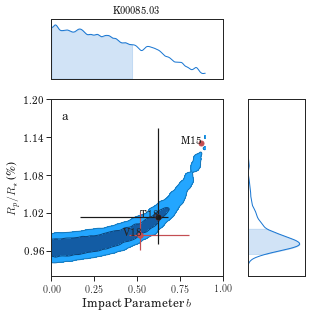

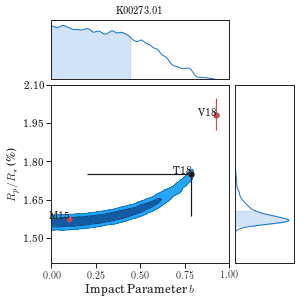

In [11]:
# This is an example where V18 said there was a high impact parameter, but F15 said no
,close all

id_koicand = 'K00085.03'
plot_corner(id_koicand)
fig = gcf()
axL = fig.get_axes()
setp([axL[0],axL[2]], xlim=(-0.001,1))
setp([axL[2],axL[3]], ylim=(0.0092,0.012))
setp(axL[0],title=id_koicand)
letter_plot('a')
tight_layout()
gcf().savefig('paper/fig_m15-high-v18-low.pdf')

    
id_koicand = 'K00273.01'
plot_corner(id_koicand)
fig = gcf()
axL = fig.get_axes()
setp([axL[0],axL[2]], xlim=(-0.001,1))
setp([axL[2],axL[3]], ylim=(0.014,0.021))

setp(axL[0],title=id_koicand)
text(0.1,0.9,id_koicand,transform=ax.transAxes)
letter_plot('b')
tight_layout()
gcf().savefig('paper/fig_m15-low-v18-high.pdf')


In [ ]:
import seaborn as sns
from keprat.plot import ContourPlotter
sns.set_context('paper')
sns.set_style('ticks')
df = keprat.io.load_table('cksgaia-planets')
#df = df.query('1.0 < f18_srad < 2.0')
#df = df.query('1 < f18_smass < 1.4')
fig, axL = subplots(ncols=2,nrows=1,figsize=(7.5,4))
df['x'] = df['f18_period']
df['dr25_prad'] = df.eval('dr25_RD1_cum * f18_srad * 109')
df['dr25_prad_err'] = df.eval('dr25_prad * sqrt( (0.5*(dr25_RD1_cum_err1 - dr25_RD1_cum_err2)/dr25_RD1_cum)**2 + (f18_srad_err/f18_srad)**2)')

df = df.dropna(subset=['x','dr25_prad','dr25_prad_err'])
samp1 = df
samp2 = df.query('dr25_tau/f18_tau0 > 0.6')

sca(axL[0])
p2 = ContourPlotter(samp1.x,samp1.f18_prad,samp1.f18_prad_err)
p2.compute_density()
p2.plot_contour(contourfkw=dict(add_colorbar=False))
p2.plot_points()

s = """\
$R_\star$ [F18]
$R_p/R_\star$ [M15]
$N_p$ = {}""".format(p2.n)
keprat.plot.add_anchored(s,4,prop=dict(size='x-small'))
letter_plot('a')
s = """\
Fulton \& Petigura (2018)
All Hosts; All Planets\
"""
title(s)

sca(axL[1])
p1 = ContourPlotter(samp2.x,samp2.dr25_prad,samp2.dr25_prad_err)
p1.compute_density()
p1.plot_contour(contourfkw=dict(add_colorbar=False))
p1.plot_points()
letter_plot('b')

s = r"""\
$R_\star$ [F18]
$R_p/R_\star$ [DR25]
$R_\tau$ $>$ 0.6
$N_p$ = {}""".format(p1.n)
keprat.plot.add_anchored(s,4,prop=dict(size='x-small'))
s = """\
This Work
All Hosts; Transit Duration Filter\
"""
title(s)


tight_layout()
fig.subplots_adjust(right=0.9)
ticks = arange(0,1.001,0.2)
ax = fig.add_axes([0.92,0.3,0.01,0.5])
cb = gcf().colorbar(p2.im,ticks=ticks,cax=ax)
cb.set_label('Relative Density of Planets')
cb.ax.set_yticklabels("{:.1f}".format(f) for f in ticks)

gcf().savefig('paper/fig_compare-per-prad-smass=all.pdf')

In [ ]:
sns.set_context('paper',font_scale=1.1)
sns.set_style('ticks')
df = keprat.io.load_table('cksgaia-planets')
#df = df.query('1.0 < f18_srad < 2.0')
df = df.query('1.0 < f18_smass < 1.4')
fig, axL = subplots(ncols=2,nrows=1,figsize=(7.5,4))
df['x'] = df['f18_period']
df['dr25_prad'] = df.eval('dr25_RD1_cum * f18_srad * 109')
df['dr25_prad_err'] = df.eval('dr25_prad * sqrt( (0.5*(dr25_RD1_cum_err1 - dr25_RD1_cum_err2)/dr25_RD1_cum)**2 + (f18_srad_err/f18_srad)**2)')

df = df.dropna(subset=['x','dr25_prad','dr25_prad_err'])
samp1 = df
samp2 = df.query('dr25_tau/f18_tau0 > 0.6')

sca(axL[0])
p2 = ContourPlotter(samp1.x,samp1.f18_prad,samp1.f18_prad_err)
p2.compute_density()
p2.plot_contour(contourfkw=dict(add_colorbar=False))
p2.plot_points()
s = r"""\
$M_\star$ = 1.0-1.4 $M_\odot$
$N_p$ = {}""".format(p2.n)
keprat.plot.add_anchored(s,4,prop=dict(size='x-small'))

letter_plot('c')
s = """\
Fulton \& Petigura (2018)
High Mass Hosts; All Planets\
"""
title(s)

sca(axL[1])
p1 = ContourPlotter(samp2.x,samp2.dr25_prad,samp2.dr25_prad_err)
p1.compute_density()
p1.plot_contour(contourfkw=dict(add_colorbar=False))
p1.plot_points()
s = r"""\
$M_\star$ = 1.0-1.4 $M_\odot$
$N_p$ = {}""".format(p1.n)
keprat.plot.add_anchored(s,4,prop=dict(size='x-small'))

letter_plot('d')
s = """\
This Work
High Mass Hosts; Transit Duration Filter\
"""
title(s)

tight_layout()
fig.subplots_adjust(right=0.9)
ticks = arange(0,1.001,0.2)
ax = fig.add_axes([0.92,0.3,0.01,0.5])
cb = gcf().colorbar(p2.im,ticks=ticks,cax=ax)
cb.set_label('Relative Density of Planets')
cb.ax.set_yticklabels("{:.1f}".format(f) for f in ticks)
gcf().savefig('paper/fig_compare-per-prad-smass=high.pdf')


read table v18 from load_table_cache.hdf
read table dr25 from load_table_cache.hdf


NameError: name 'ContourPlotter' is not defined